In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df.rename({'RegionName': 'Zipcode'}, axis='columns', inplace=True)

In [4]:
san_francisco = df.loc[df['City'] == 'San Francisco']
nyc = df.loc[df['City'] == 'New York']

In [5]:
def melt_data(df):
    
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [6]:
sf_ts = melt_data(san_francisco)
nyc_ts = melt_data(nyc)

In [21]:
sf_ts = sf_ts['1997':'2017']
nyc_ts = nyc_ts['1997':'2017']

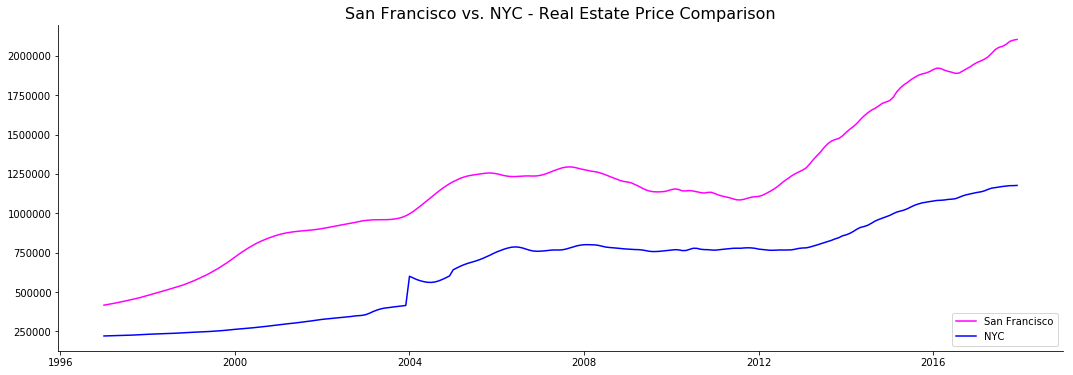

In [22]:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(sf_ts, label='San Francisco', color='magenta')
ax.plot(nyc_ts, label='NYC', color='blue')
plt.title('San Francisco vs. NYC - Real Estate Price Comparison', fontsize=16)
ax.legend(loc=4)
plt.show();

In [110]:
def plot_roll(ts):
    
    '''Takes a time series and plots it along with rolling mean and rolling standard deviation.'''
    
    rolmean = ts.rolling(window = 6, center = False).mean()
    rolstd = ts.rolling(window = 6, center = False).std()
    fig = plt.figure(figsize=(18,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False);

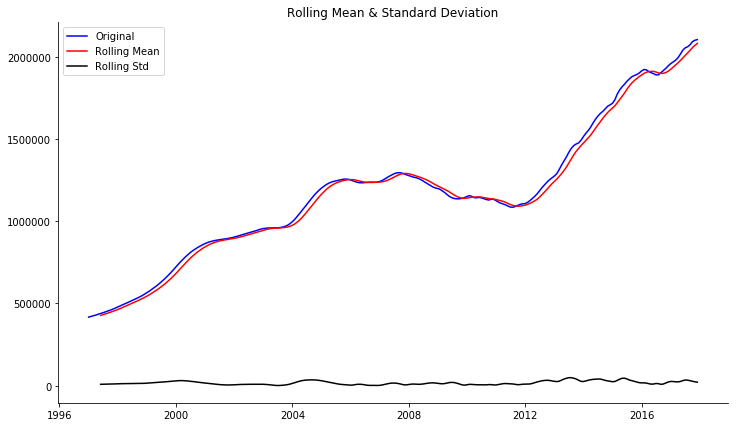

In [25]:
plot_roll(sf_ts)

In [113]:
def plot_yearly_ts(ts, boxplot=False):
    
    '''Function takes a time series and groups it into yearly intervals using Grouper;
    Creates a new dataframe where yearly values are into columns to faciliate plotting.
    Gives the option to create a boxplot instead of line plot, if parameter is passed as True.'''
    
    # group data by year and made into dataframe
    year_group = ts.groupby(pd.Grouper(freq ='A'))
    yearly = pd.DataFrame()
    for year, group in year_group:
        yearly[year.year] = group.values.ravel()
        
    # plot boxplot if option is True
    if boxplot:
        ax = yearly.boxplot(figsize = (18,10))
        ax.set_ylabel('Value($)')
        ax.set_xlabel('Year')
        plt.title('Mean Zillow Home Value Index (ZHVI) - Yearly', fontsize=18);
        
   # otherwise plot line plot
    else:
        plt.figure(figsize = (14,10))
        ax = plt.subplot(111)
        # speficy colors for plots
        tableau20 = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.8588235294117647, 0.8588235294117647, 0.5529411764705883), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764)]
        # remove borders from plot
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        n_points = yearly.shape[0]
        for rank, year in enumerate(yearly):
            ax.plot(np.arange(n_points-(n_points-1), n_points+1), yearly[year].values, color=tableau20[rank], lw=2)
            plt.xlim(1, 12)
            y_pos = yearly[year].values[-1] 
            ax.text(n_points, y_pos, year, color=tableau20[rank], fontsize=12)
            ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
            ax.set_ylabel('Value($)')
            ax.set_xlabel('Month')
            plt.title('Mean Zillow Home Value Index (ZHVI) - Yearly', fontsize=18)

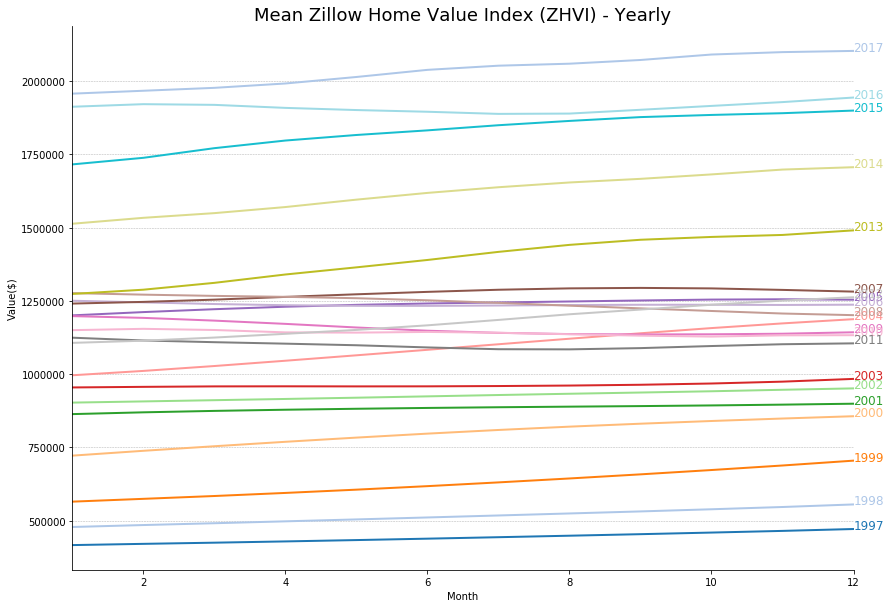

In [114]:
plot_yearly_ts(sf_ts)

In [74]:
def gain(ts):
    roi_2 = (ts - ts.shift(periods=24))/ts.shift(periods=24)*100
    roi_5 = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10 = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    plt.figure(figsize = (12,8))
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.plot(roi_2, label='Return in 2 Years')
    ax.plot(roi_5, label='Return in 5 Years')
    ax.plot(roi_10, label='Return in 10 Years')
    ax.fill_between(roi_2.index, roi_2.value<0, -20, color='red', alpha=.2)
    ax.set_ylabel('Gain Percentage')
    ax.set_xlabel('Year')
    plt.yticks([-10,0,10,25,50,75,100,125,150,175,200], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200]], fontsize=10)
    ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
    plt.title('Mean Zillow Home Value Index (ZHVI) - ROI Over Time Invested', fontsize=14)
    plt.legend()
    plt.show()
    return roi_2, roi_5, roi_10

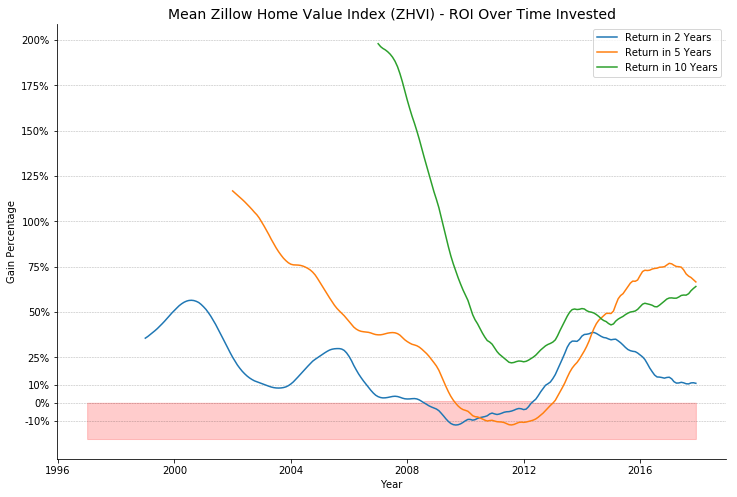

In [75]:
sf_roi2, sf_roi5, sf_roi10 = gain(sf_ts)

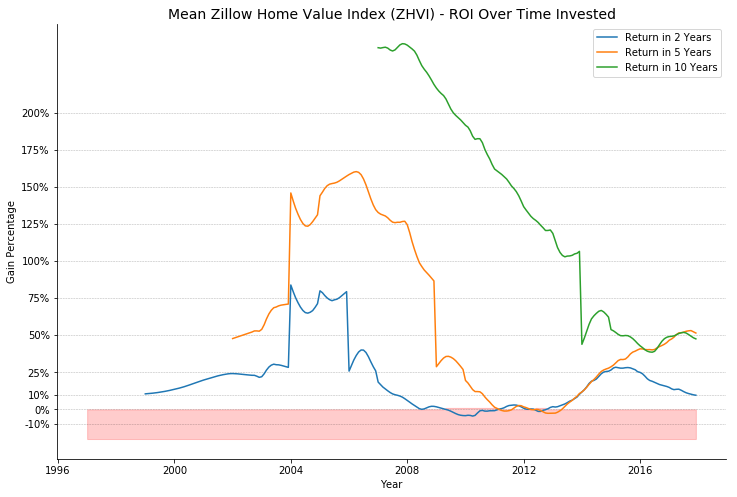

In [66]:
nyc_roi2, nyc_roi5, nyc_roi10 = gain(nyc_ts)

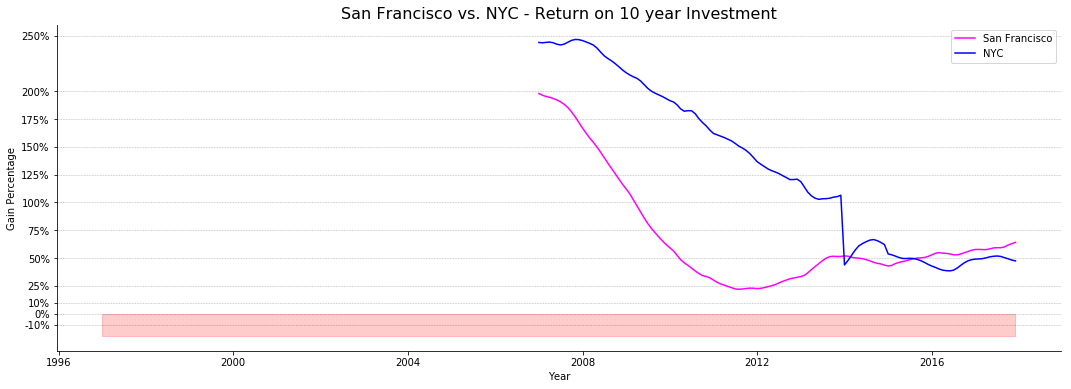

In [69]:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(sf_roi10, label='San Francisco', color='magenta')
ax.plot(nyc_roi10, label='NYC', color='blue')
ax.fill_between(sf_roi10.index, sf_roi10.value<0, -20, color='red', alpha=.2)
plt.title('San Francisco vs. NYC - Return on 10 year Investment', fontsize=16)
ax.set_ylabel('Gain Percentage')
ax.set_xlabel('Year')
plt.yticks([-10,0,10,25,50,75,100,125,150,175,200, 250], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200, 250]], fontsize=10)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
ax.legend()
plt.show();

In [107]:
nyc_roi5.idxmin()

value   2012-11-01
dtype: datetime64[ns]

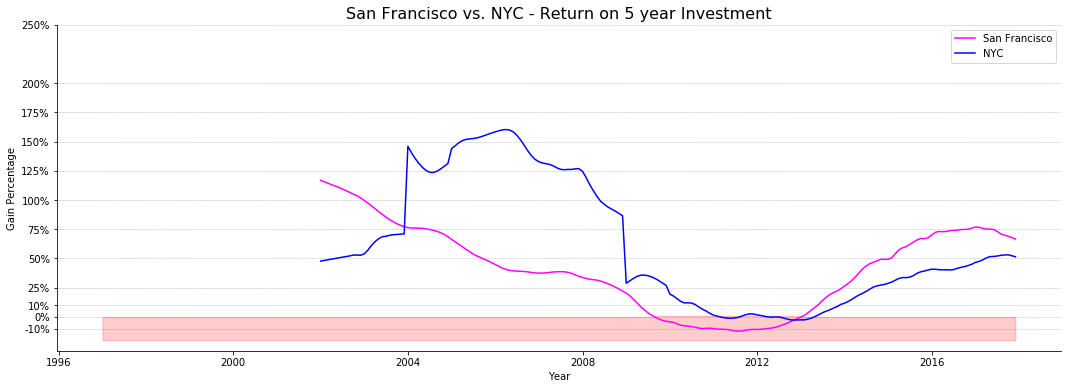

In [109]:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(sf_roi5, label='San Francisco', color='magenta')
ax.plot(nyc_roi5, label='NYC', color='blue')
ax.fill_between(sf_roi5.index, sf_roi5.value<0, -20, color='red', alpha=.2)
plt.title('San Francisco vs. NYC - Return on 5 year Investment', fontsize=16)
ax.set_ylabel('Gain Percentage')
ax.set_xlabel('Year')

plt.yticks([-10,0,10,25,50,75,100,125,150,175,200, 250], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200, 250]], fontsize=10)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
ax.legend()
plt.show();

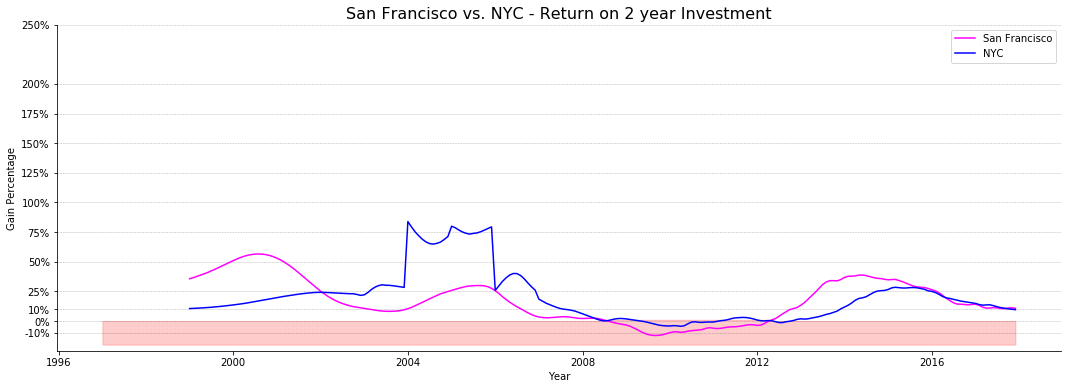

In [71]:
plt.figure(figsize=(18,6))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.plot(sf_roi2, label='San Francisco', color='magenta')
ax.plot(nyc_roi2, label='NYC', color='blue')
ax.fill_between(sf_roi2.index, sf_roi5.value<0, -20, color='red', alpha=.2)
plt.title('San Francisco vs. NYC - Return on 2 year Investment', fontsize=16)
ax.set_ylabel('Gain Percentage')
ax.set_xlabel('Year')
plt.yticks([-10,0,10,25,50,75,100,125,150,175,200, 250], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200, 250]], fontsize=10)
ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
ax.legend()
plt.show();